## Final Project Submission

Please fill out:
* Student name: Group 14
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county

## Business Problem

This study aims to address the importance of identifying the factors that significantly influence home costs.Because conventional methods rely on anecdotal evidence or limited research, they often yield incorrect findings. This knowledge gap makes it more difficult for stakeholders to predict and assess changes in house prices. To solve this issue, we propose using multiple regression modeling techniques to thoroughly analyze home sales data. several regression is a useful tool for analyzing the relationship between different attributes and home sales prices since it takes into consideration the combined impact of several independent variables.


another: , being a newcomer in the real estate 
industry wants help in finding the top 5 best zip code areas in the USA, where smart 
investments can be made. The business challenge at hand is to identify the most 
promising zip code areas for our stakeholder to invest in real estate. This will involves 
examining historical housing price data, considering factors like return on 
investment, region size ranking and property value volatility to uncover patterns, 
trends, and relationships within the data.

## Objectives
1. Houses that require the least renovation that create high profit margin. 
2. Which zipcode has the best investement. 
3. 

## Load Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Load data into pandas and engineer "make" feature
data = pd.read_csv("./data/kc_house_data.csv")
data.tail(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21547,9406530090,10/20/2014,337000.0,4,2.50,2470,5100,2.0,NO,NONE,...,8 Good,2470,0.0,2005,0.0,98038,47.3622,-122.041,2240,5123
21548,7168100015,10/9/2014,579950.0,5,2.75,3080,5752,2.0,NO,NONE,...,9 Better,3080,0.0,2014,0.0,98059,47.4922,-122.153,3000,4650
21549,5007500120,2/26/2015,341780.0,4,2.75,2260,4440,2.0,NO,NONE,...,7 Average,2260,0.0,2014,0.0,98001,47.3507,-122.291,2260,4563
21550,3528900770,4/23/2015,710200.0,4,3.00,1670,2642,2.0,NaN,NONE,...,8 Good,1350,320.0,2008,0.0,98109,47.6397,-122.345,1670,2594
21551,9521100031,6/18/2014,690000.0,3,3.25,1540,1428,3.0,NO,NONE,...,9 Better,1540,0.0,2013,NaN,98103,47.6648,-122.353,1660,3300
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,2.0,NO,NONE,...,10 Very Good,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21553,6021503705,10/15/2014,329000.0,2,2.50,980,1020,3.0,NO,NONE,...,8 Good,980,0.0,2008,NaN,98117,47.6844,-122.387,980,1023
21554,3438501862,5/13/2014,330000.0,3,2.50,1450,5008,1.0,NO,NONE,...,7 Average,840,610.0,2007,0.0,98106,47.5435,-122.357,2120,5019
21555,3345700207,5/2/2015,608500.0,4,3.50,2850,5577,2.0,NO,NONE,...,8 Good,1950,900.0,2014,0.0,98056,47.5252,-122.192,2850,5708
21556,6056111067,7/7/2014,230000.0,3,1.75,1140,1201,2.0,NO,NONE,...,8 Good,1140,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552


## Explanatory Data

In [2]:
data.shape

(21597, 21)

In [3]:
data.describe() # Statistical distribution of the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Preparation

#### Data Cleaning

In [7]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
missing_values = data.isna() # Checks missing values 
missing_values.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [10]:
missing_data = missing_values(data)
missing_data

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015
2,view,63,0.002917


Replace the rows with the missing values for **View** with the mode of view

In [11]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
data['view'] = data['view'].fillna(data['view'].mode().iloc[0])

In [13]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Drop the rows with missing values in **Waterfront**

In [14]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [15]:
# Mode imputation for the missing values in waterfront
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])

In [16]:
# check forthe count unique values in the year renoveted colum
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
# Replace null with the most frequent value
data['yr_renovated'].fillna(0,inplace=True)

In [18]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Missing Values

In [19]:
# Drop rows with '?' in 'sqft_basement'
data = data[data['sqft_basement'] != '?']

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [20]:
# Convert 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [21]:
## Covert the data type for data
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y' )

In [22]:
data.shape

(21143, 21)

## Encoding Categorical Columns in the Data

In [23]:
# Encode the column waterfront
waterfront_category_order = {
    'NO': 0,
    "YES" : 1
}

# Perform ordinal encoding on the "waterfront" column
data["waterfront_encoded"] = data["waterfront"].map(waterfront_category_order)

# Replace the original "waterfront" column with the encoded values
data["waterfront"] = data["waterfront_encoded"]

data['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [24]:
# Let's check the count of the encoded column of waterfront
data['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [25]:
# Encode the column view
# Define the order of the categories
view_category_order = {
    "NONE": 0,
    "AVERAGE": 1,
    "GOOD": 2,
    "FAIR": 3,
    "EXCELLENT": 4
}

# Perform ordinal encoding on the "view" column
data["view_encoded"] = data["view"].map(view_category_order)

# Replace the original "view" column with the encoded values
data["view"] = data["view_encoded"]

data['view'].value_counts()

0    19079
1      930
2      496
3      327
4      311
Name: view, dtype: int64

In [26]:
# Let's encode the condition column 
condition_category_order = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Perform ordinal encoding on the "condition" column
data["condition_encoded"] = data["condition"].map(condition_category_order)

# Replace the original "condition" column with the encoded values
data["condition"] = data["condition_encoded"]

data['condition'].value_counts()

3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64

In [27]:
# Encode the grade column
grade_category_order = {
    "3 Poor": 3,
    "5 Fair": 5,
    "4 Low": 4,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Perform ordinal encoding on the "grade" column
data["grade_encoded"] = data["grade"].replace(grade_category_order)

# Replace the original "grade" column with the encoded values
data["grade"] = data["grade_encoded"]

data['grade'].value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
encoded_data = data
encoded_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_encoded,view_encoded,condition_encoded,grade_encoded
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,3,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,0,0,3,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,3,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,0,0,5,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,0,0,3,8
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,0,0,3,8
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,0,0,3,7
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,0,0,3,8


In [29]:
data.dtypes

id                             int64
date                  datetime64[ns]
price                        float64
bedrooms                       int64
bathrooms                    float64
sqft_living                    int64
sqft_lot                       int64
floors                       float64
waterfront                     int64
view                           int64
condition                      int64
grade                          int64
sqft_above                     int64
sqft_basement                float64
yr_built                       int64
yr_renovated                 float64
zipcode                        int64
lat                          float64
long                         float64
sqft_living15                  int64
sqft_lot15                     int64
waterfront_encoded             int64
view_encoded                   int64
condition_encoded              int64
grade_encoded                  int64
dtype: object

In [30]:
# Drop the encoded columns
data_updated= encoded_data.drop(["waterfront_encoded", "view_encoded", "condition_encoded", "grade_encoded"], axis=1)

# Check the updated dataset
data_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [31]:
### Drop the unnecessary
data_updated.drop(['id','yr_built','yr_renovated','zipcode','long'], axis=1,inplace=True)
data_updated.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,47.5112,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,47.7210,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,47.7379,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,47.5208,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,47.6168,1800,7503


### Explanatory Data Analysis

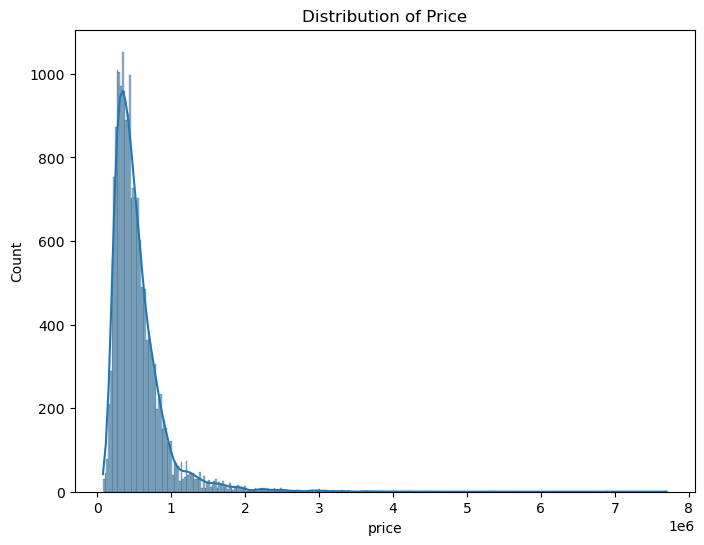

In [32]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data_updated, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

The diagram shows a positively skewed distribution of the price

In [33]:
### Check Correlation
data_updated.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.387878,0.035290,0.667738,0.605143,0.325008,0.306507,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.072502,0.025710,0.356882,0.479210,0.302683,-0.009521,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.171079,-0.128015,0.666493,0.686456,0.282693,0.024994,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.263900,-0.061294,0.763101,0.876678,0.434576,0.052986,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.050720,-0.009671,0.113402,0.183461,0.015533,-0.085457,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.016255,-0.264280,0.459214,0.524225,-0.245144,0.048977,0.280294,-0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.408943,0.016728,0.083602,0.072201,0.084949,-0.011567,0.085174,0.030250
view,0.387878,0.072502,0.171079,0.263900,0.050720,0.016255,0.408943,1.000000,0.046585,0.227733,0.150351,0.266334,0.014825,0.261981,0.052490
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.046585,1.000000,-0.148508,-0.159289,0.170972,-0.015592,-0.093493,-0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.227733,-0.148508,1.000000,0.756382,0.168023,0.113380,0.713574,0.121921


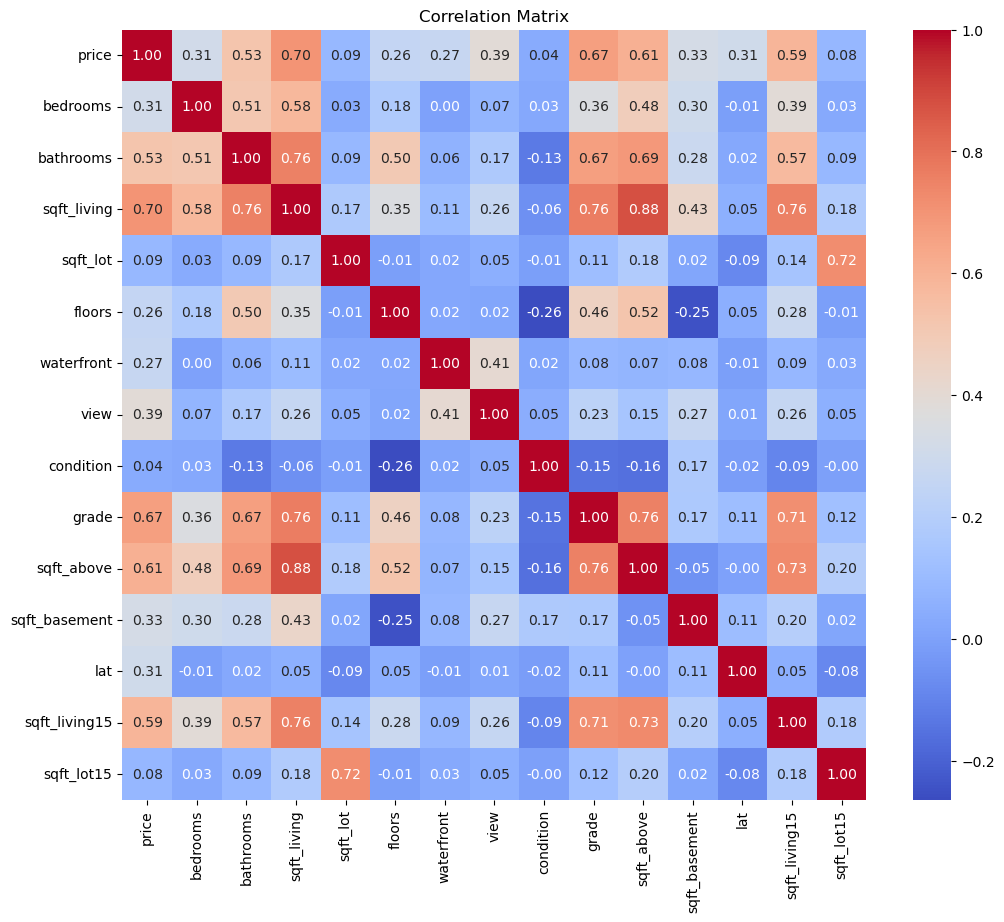

In [34]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_updated.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Dealing with multicollinearity of sqft_leaving
We have seen that seen that sqft_leaving has a high multicollinearity with other varibales and needs to be cleaned. 

In [35]:
data = data_updated
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,47.5112,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,47.7210,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,47.7379,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,47.5208,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,47.6168,1800,7503


In [36]:
data.shape

(21143, 16)

## Model Iterations

In [37]:
data.corr(numeric_only=True)['price']

price            1.000000
bedrooms         0.309204
bathrooms        0.525889
sqft_living      0.702328
sqft_lot         0.087937
floors           0.256355
waterfront       0.265969
view             0.387878
condition        0.035290
grade            0.667738
sqft_above       0.605143
sqft_basement    0.325008
lat              0.306507
sqft_living15    0.586415
sqft_lot15       0.083192
Name: price, dtype: float64

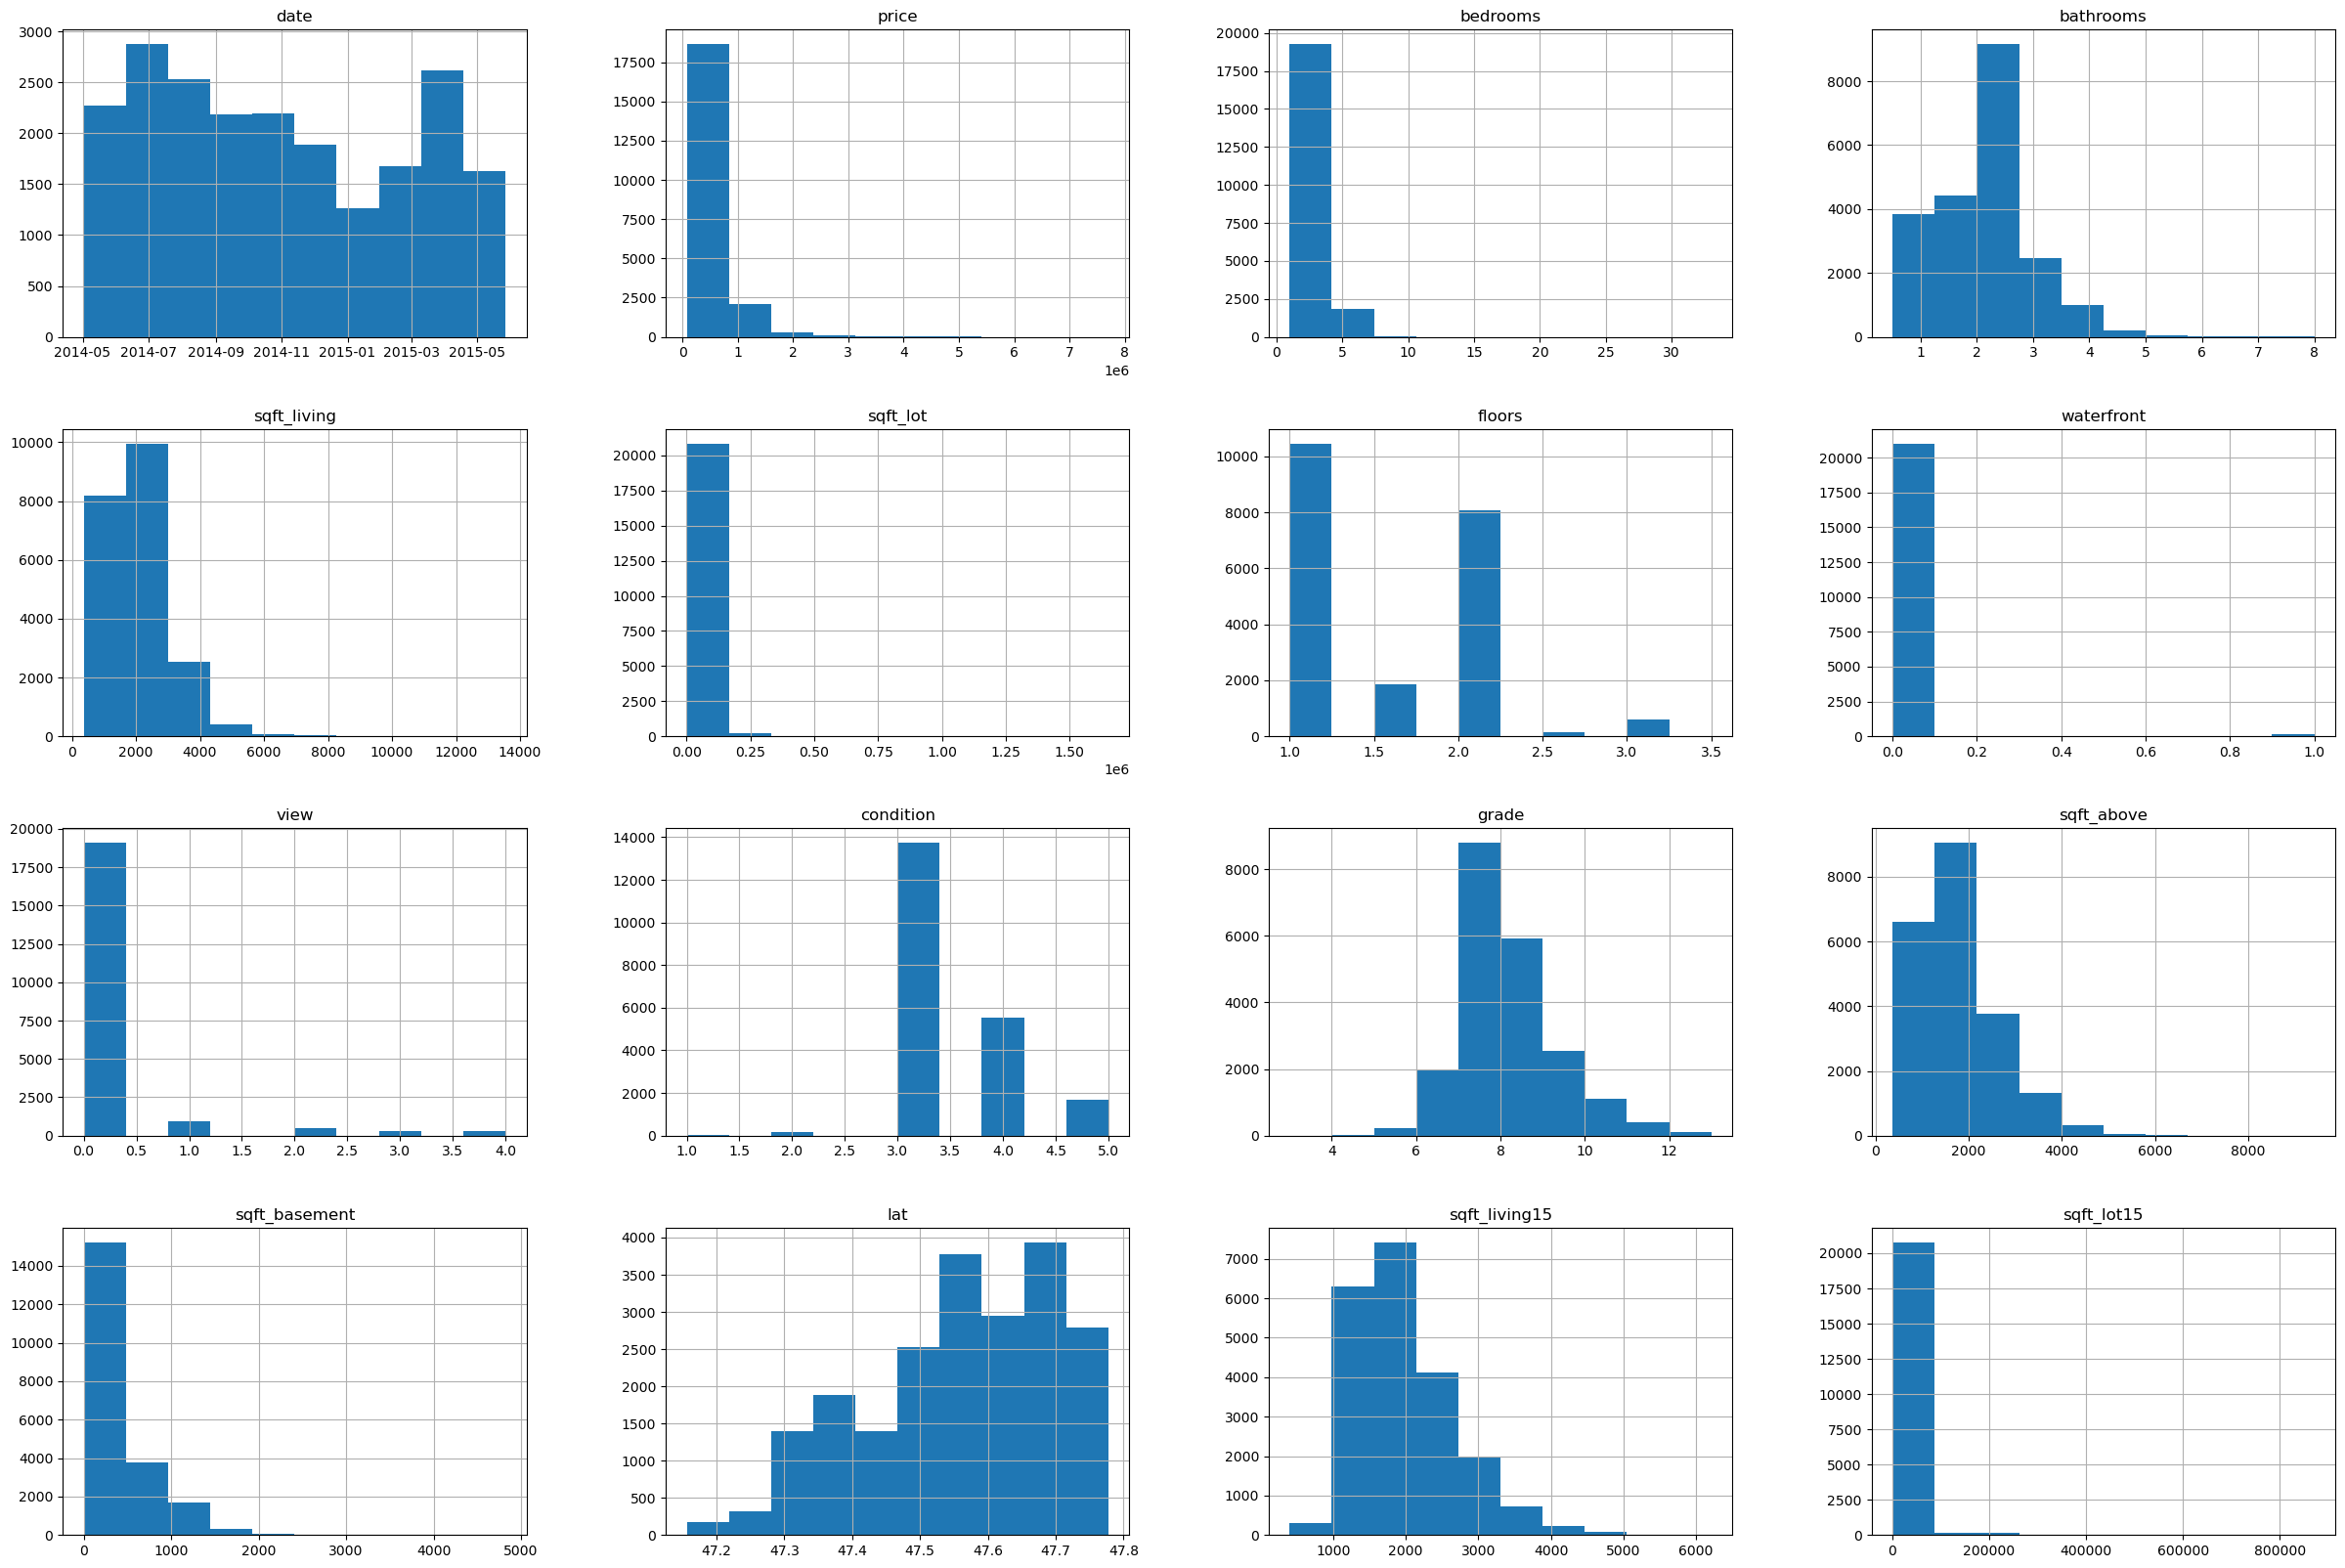

In [38]:
data.hist(figsize=(30,20))
plt.show()

###  1. Basic Model: Simple Linear Regression with 'sqft_living': ( Baseline Model)

In [39]:
import statsmodels.api as sm

In [40]:
# Selecting the feature and target variable
X_baseline = data[['sqft_living']]  # Feature (independent variable)
y = data['price'] # Target (dependent variable)

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:12:00   Log-Likelihood:            -2.9378e+05
No. Observations:               21143   AIC:                         5.876e+05
Df Residuals:                   21141   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4462.443    -10.113      

Regression Line:

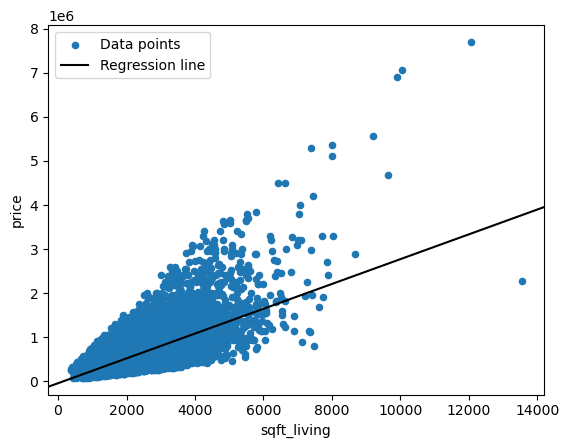

In [41]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

The residuals:

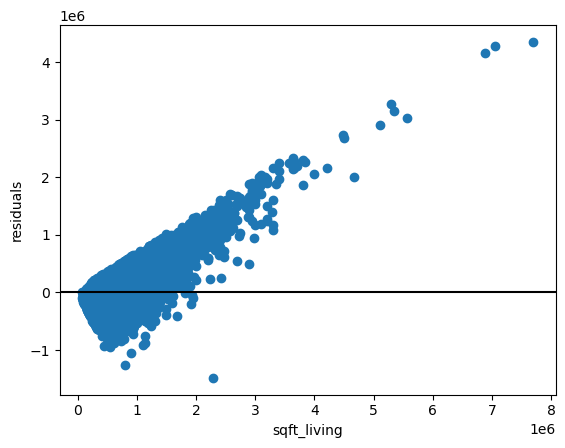

In [42]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### 2. Baseline Model after Log Transformation

In [51]:
X_baseline = np.log(data[['sqft_living']]) # Feature (independent variable)
y = np.log(data['price'])# Target (dependent variable)

baseline_model_log = sm.OLS(y, sm.add_constant(X_baseline))
log_baseline_results = baseline_model_log.fit()

print(log_baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:13:25   Log-Likelihood:                -10023.
No. Observations:               21143   AIC:                         2.005e+04
Df Residuals:                   21141   BIC:                         2.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7210      0.048    140.939      


### 3. Add More Features for Multiple Regression without log transformation

In [72]:
features = ['sqft_living', 'floors', 'condition','view']

X_one= (data[features])
y = (data['price']) 

subset_model_one = sm.OLS(y, sm.add_constant(X_one))
subset_results_one = subset_model_one.fit()

print(subset_results_one.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6292.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:18:54   Log-Likelihood:            -2.9268e+05
No. Observations:               21143   AIC:                         5.854e+05
Df Residuals:                   21138   BIC:                         5.854e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.077e+05   1.19e+04    -17.431      

### 4. Add More Features for Multiple Regression with log transformation

In [78]:
# Select multiple features for multiple regression
features = ['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'condition',]

X = np.log(data[features])
y = np.log(data['price']) 

subset_model = sm.OLS(y, sm.add_constant(X))
subset_results = subset_model.fit()

print(subset_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     5339.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:20:27   Log-Likelihood:                -7809.5
No. Observations:               21143   AIC:                         1.563e+04
Df Residuals:                   21137   BIC:                         1.568e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4830      0.067     82.274      

**Without log tranformations**

In [73]:
from sklearn.metrics import mean_squared_error

# Make predictions using the model
predictions = baseline_results.predict(sm.add_constant(X_baseline))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 475907713895.23944


In [74]:
from sklearn.metrics import mean_squared_error

# Make predictions using the model
predictions = subset_results_one.predict(sm.add_constant(X_one))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 61843203623.84611


**With log tranformations**

In [75]:
from sklearn.metrics import mean_squared_error

# Make predictions using the model
predictions = log_baseline_results.predict(sm.add_constant(X_baseline))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 427610426223.37836


In [76]:
from sklearn.metrics import mean_squared_error

# Make predictions using the model
predictions = subset_results.predict(sm.add_constant(X))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 427610388355.1905


## Asumptions

We will inspect **linearity, independence, nomrality and Equal Variance**

### The Linearity Assumption

Text(0.5, 1.0, 'Linear Relationship Residual Plot')

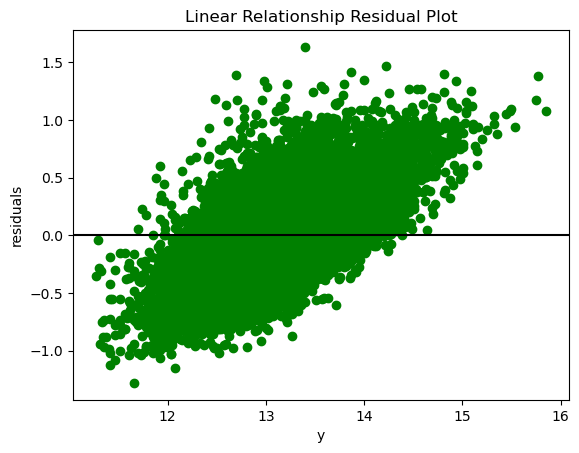

In [58]:
fig, ax = plt.subplots()

ax.scatter(y, subset_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot")

In [59]:
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(subset_results)

(0.9590889631807366, 0.9841032518456317)

### Independence Assumption
Interpret Dubin-Watson

## Normality Assumption

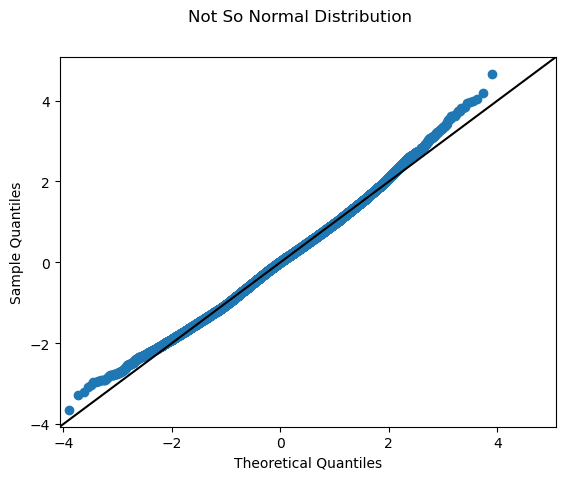

In [60]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(subset_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

### The Homoscedasticity Assumption

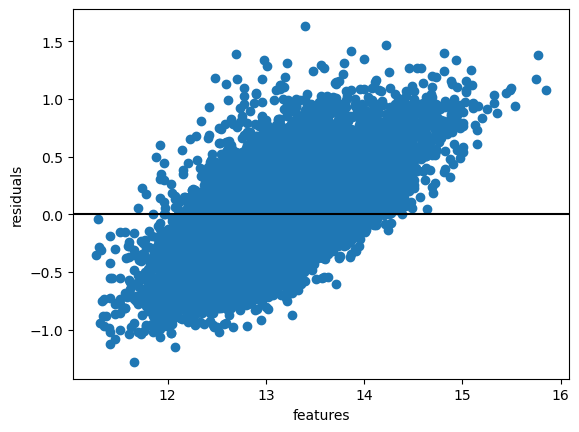

In [61]:
fig, ax = plt.subplots()

ax.scatter(x = np.log(data["price"]), y = subset_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("features")
ax.set_ylabel("residuals");

## Results Interpretation